In [2]:
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')


In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Separate features (pixels) and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values


X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values


In [7]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [8]:
# Reshape features to 28x28x1 images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [9]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
# Define the CNN model architecture
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=512,validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 239s 5ms/sample - loss: 0.9676 - accuracy: 0.6669 - val_loss: 0.6014 - val_accuracy: 0.7687
Epoch 2/5
48000/48000 [==============================] - 215s 4ms/sample - loss: 0.5337 - accuracy: 0.8005 - val_loss: 0.4817 - val_accuracy: 0.8224
Epoch 3/5
48000/48000 [==============================] - 234s 5ms/sample - loss: 0.4565 - accuracy: 0.8317 - val_loss: 0.4193 - val_accuracy: 0.8469
Epoch 4/5
48000/48000 [==============================] - 219s 5ms/sample - loss: 0.4041 - accuracy: 0.8556 - val_loss: 0.3866 - val_accuracy: 0.8565
Epoch 5/5
48000/48000 [==============================] - 222s 5ms/sample - loss: 0.3709 - accuracy: 0.8664 - val_loss: 0.3619 - val_accuracy: 0.8694


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)
print(test_loss)

10000/10000 [==============================] - 30s 3ms/sample - loss: 0.3516 - accuracy: 0.8753 1s - loss:
0.8753
0.35155360519886014


In [15]:
# Make predictions on test data
predictions = model.predict(X_test)
predicted_classes = [np.argmax(pred) for pred in predictions]


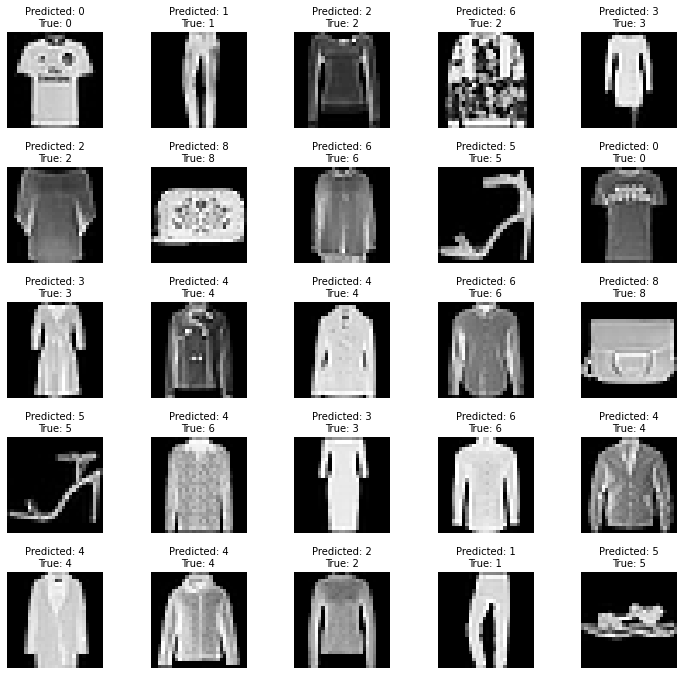

In [16]:
# Visualize sample predictions alongside true class labels
import matplotlib.pyplot as plt

L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Predicted: {predicted_classes[i]}\nTrue: {y_test[i]}', fontsize=10)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()